# **"Optimizing Study Efficiency to Predict Exam Performance Using Machine Learning Techniques":**

# **About the Author:**

**Name: Adil Zaman**

**Email ID: zamanadil61@gmail.com**

**Linkedin ID:https://www.linkedin.com/in/adil-zaman-85b56a398/**

# **About the Dataset:**

>**This dataset provides an extensive and realistic representation of various factors that contribute to student
exam performance. It contains 20,000 records, each describing a student’s academic behavior, study habits,
lifestyle routines, and exam conditions. These variables collectively help understand how different aspects of
a student’s daily life and learning environment influence their exam outcomes. The dataset includes details
such as daily study hours, class attendance percentage, sleep duration and quality, internet availability, study
method, institutional facility rating, and exam difficulty level. These factors reflect a broad spectrum of
influences commonly observed in educational settings. The exam score (0–100) is derived using a weighted
formula that mimics real-life academic performance patterns.**

>**For example: Higher study hours and consistent attendance often correlate with stronger performance. Better
sleep quality and balanced rest contribute positively. Coaching and mixed study methods typically help
students achieve higher marks. Limited internet access or poor institutional facilities may create a disadvantage. Harder exam papers reduce achievable scores, while easier ones increase performance. The
dataset is fully synthetic yet designed to mirror logical and realistic student behavior. It contains no
personally identifiable information and is suitable for educational research, statistical exploration, behavior
analysis, institution-level studies, and general data-driven insights. Whether used for visualizing score
distributions, comparing study habits, evaluating lifestyle effects, or simply exploring student performance
patterns, this dataset provides a well-structured and diverse foundation for understanding exam outcomes.**

# **Smart Utilization of Study Hours in the Digital Age:**

>**In the modern digital era, internet access enables students to use their study hours more intelligently by accessing online resources, interactive learning platforms, and AI-based tools that enhance understanding in less time. Smart use of digital content, recorded lectures, and real-time information helps optimize learning efficiency while reducing unnecessary effort. As a result, students can save significant time and focus more on conceptual clarity and productive learning rather than traditional time-consuming methods.**

>**First to perform the Exploratory Data Analysis(EDA) of the dataset;**

# **Exploratory Data Analysis (EDA):**

**First to import the Libraries;**

In [ ]:
# Import the Libraries;
#Let's start the project by importing all the libraries for that particular dataset
import pandas as pd
import numpy as np
# To visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# To preprocess the dataset
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,MinMaxScaler,RobustScaler,PowerTransformer
from sklearn.impute import SimpleImputer,KNNImputer
# to import the iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# for machine learning tasks
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# for regression tasks
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
#For Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,mean_squared_error,mean_absolute_error,r2_score
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Now to load the dataset;**

# **Load the Dataset:**

In [ ]:
df=pd.read_csv('Exam_Score_Prediction.csv')
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


**Now to perform the Sneak-Peak of dataset;**

# **Sneak-Peak of Dataset:**

In [ ]:
df.shape

(20000, 13)

**Here we see that their will be 20000 rows and 13 columns in that dataset.**

In [ ]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [ ]:
df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


In [ ]:
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [ ]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


>**Here wee see from the counts that their will be no missing value in that dataset.**

>**Now to check the uniqueness of the dataset;**

# **Uniqueness of the Dataset:**

In [ ]:
df['student_id'].unique()

array([    1,     2,     3, ..., 19999, 20000, 20001])

In [ ]:
df['age'].unique()

array([17, 23, 22, 20, 18, 21, 24, 19])

In [ ]:
df['class_attendance'].unique()

array([92.9, 64.8, 76.8, 48.4, 71.6, 65.4, 69. , 51.1, 92. , 44.8, 86.9,
       96.6, 46.4, 66. , 75.1, 99.4, 91.9, 64.9, 98.1, 59.9, 60.4, 70.4,
       86.8, 51.5, 84.5, 40.6, 55.7, 98.5, 79.4, 67.8, 83.9, 66.1, 69.9,
       97.3, 56.4, 43.2, 67.3, 60.1, 69.3, 95.8, 55. , 52. , 72. , 49. ,
       74.8, 74.5, 76.3, 57.4, 59.7, 90.1, 77.5, 63.9, 61. , 91.8, 83.7,
       46.1, 43.4, 42. , 41.7, 69.8, 50.9, 80.5, 45.6, 42.2, 75.2, 61.2,
       44.7, 96.1, 64.3, 65.8, 62.9, 43.6, 82.6, 79.9, 49.9, 56.1, 72.8,
       62.6, 52.3, 73.4, 59.3, 73.1, 79.2, 44.6, 84.1, 68. , 73.7, 61.7,
       80.6, 46.2, 93.7, 54.1, 92.1, 93.1, 53.8, 85.9, 97.5, 55.3, 94.8,
       52.5, 61.6, 93.2, 58.2, 85.3, 48.8, 62.7, 96.4, 53.6, 82.1, 95.2,
       87.1, 96.9, 46.8, 76.1, 65.6, 81. , 84.6, 54.7, 88. , 64.6, 65.7,
       60.8, 81.6, 72.5, 91.2, 87.2, 95. , 49.4, 78.4, 44.9, 70. , 91.7,
       83.5, 75. , 50.4, 52.7, 50. , 96.2, 67.7, 41.6, 44. , 40.9, 72.3,
       51.6, 64.1, 67.6, 93.6, 42.6, 69.7, 47.9, 95

In [ ]:
df['course'].unique()

array(['diploma', 'bca', 'b.sc', 'b.tech', 'bba', 'ba', 'b.com'],
      dtype=object)

In [ ]:
df['exam_difficulty'].unique()

array(['hard', 'moderate', 'easy'], dtype=object)

In [ ]:
df['exam_score'].unique()

array([ 58.9  ,  54.8  ,  90.3  ,  29.7  ,  43.7  ,  58.2  ,  53.7  ,
        47.3  ,  44.9  ,  77.7  ,  63.2  ,  53.5  ,  63.9  ,  34.1  ,
        83.5  ,  98.5  ,  70.3  ,  32.3  ,  56.2  ,  49.3  ,  68.1  ,
        52.1  ,  47.1  ,  84.8  ,  68.9  ,  76.3  ,  71.6  ,  74.1  ,
        56.6  ,  49.2  ,  97.5  ,  81.8  ,  65.6  ,  71.1  ,  60.3  ,
        81.3  ,  37.3  ,  52.   ,  65.8  ,  67.6  ,  99.3  ,  33.6  ,
        35.5  ,  42.8  , 100.   ,  50.4  ,  74.   ,  30.9  ,  75.9  ,
        75.3  ,  88.7  ,  73.6  ,  76.8  ,  64.9  ,  47.2  ,  78.1  ,
        77.8  ,  66.9  ,  70.5  ,  57.2  ,  75.5  ,  62.8  ,  31.7  ,
        19.599,  54.   ,  61.   ,  35.1  ,  57.5  ,  26.4  ,  45.3  ,
        46.9  ,  37.1  ,  78.8  ,  49.9  ,  76.9  ,  54.4  ,  28.3  ,
        53.1  ,  75.6  ,  59.8  ,  51.3  ,  23.9  ,  48.1  ,  65.3  ,
        79.5  ,  79.9  ,  61.1  ,  49.   ,  66.3  ,  49.5  ,  40.   ,
        78.7  ,  61.4  ,  69.6  ,  71.9  ,  88.5  ,  63.8  ,  51.1  ,
        91.3  ,  95.

In [ ]:
df['facility_rating'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['gender'].unique()

array(['male', 'other', 'female'], dtype=object)

In [ ]:
df['internet_access'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['sleep_hours'].unique()

array([7.4, 4.6, 8.5, 5.8, 9.8, 4.2, 8.2, 6.6, 4.1, 8.1, 7.1, 7.7, 7.3,
       8.3, 6.8, 4.4, 4.3, 9.7, 6.3, 8. , 6.7, 7. , 5.1, 6.5, 5.4, 9.5,
       5.5, 7.6, 7.8, 8.9, 5.2, 6.9, 4.9, 5.6, 5.9, 9.3, 9.6, 9.2, 8.8,
       8.4, 5.3, 9.9, 8.7, 7.2, 4.5, 9.1, 4.7, 9. , 6.1, 7.9, 6.2, 5. ,
       9.4, 4.8, 7.5, 5.7, 8.6, 6.4, 6. ])

In [ ]:
df['study_hours'].unique()

array([2.78, 3.37, 7.88, 0.67, 0.89, 3.48, 1.35, 5.48, 2.89, 6.77, 5.99,
       3.77, 6.76, 0.81, 4.65, 4.84, 1.97, 0.4 , 4.28, 4.11, 5.23, 1.7 ,
       1.44, 7.82, 0.91, 7.91, 5.76, 5.03, 2.72, 6.94, 7.28, 5.78, 5.68,
       3.95, 0.62, 0.12, 3.96, 2.94, 6.21, 5.89, 5.02, 0.6 , 1.89, 0.75,
       7.83, 1.02, 7.74, 0.9 , 6.9 , 4.6 , 6.65, 5.07, 6.15, 5.85, 2.08,
       7.48, 5.15, 1.62, 2.45, 4.26, 7.05, 6.37, 2.42, 5.51, 0.08, 2.66,
       6.72, 1.21, 2.83, 0.19, 1.17, 3.92, 7.2 , 0.68, 6.96, 5.35, 2.32,
       1.55, 6.31, 5.8 , 2.44, 0.43, 5.04, 0.72, 4.29, 4.9 , 5.5 , 1.  ,
       3.68, 3.71, 6.68, 3.75, 3.25, 0.99, 5.56, 4.96, 5.74, 5.25, 7.  ,
       7.02, 2.46, 1.46, 7.41, 5.7 , 7.77, 3.98, 7.7 , 0.98, 4.72, 3.97,
       1.54, 1.23, 0.49, 7.59, 7.72, 7.13, 7.46, 1.58, 2.06, 3.84, 4.5 ,
       2.28, 2.88, 4.94, 3.36, 3.8 , 5.42, 3.66, 7.6 , 3.88, 7.69, 6.78,
       6.11, 4.41, 1.61, 1.72, 0.27, 5.96, 4.66, 1.1 , 0.53, 4.27, 6.98,
       2.85, 7.35, 3.73, 2.53, 0.28, 5.24, 1.67, 7.

**Now to impute the missing values in a dataset;**

# **Impute the Missing Values:**

In [ ]:
df.isnull().sum()

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

>**Here we see that their is no missing values in a dataset.**

>**Now to visualize the imputation of the dataset.**

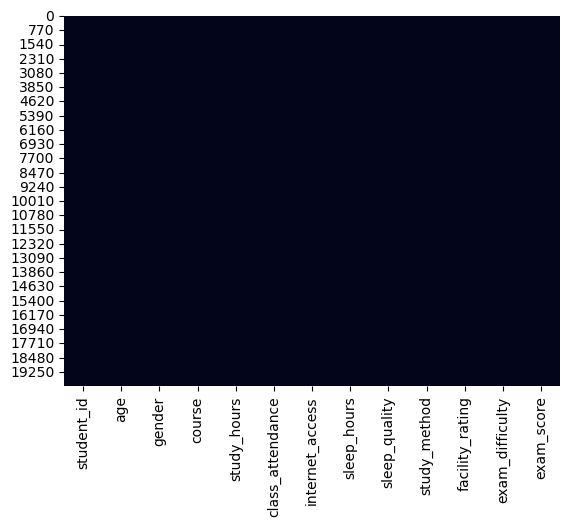

In [ ]:
# Now to visualize the imputation via heat map
sns.heatmap(df.isnull(),cbar=False)
plt.show()

**Now to check the outliers from the dataset;**

# **Outliers from the Dataset:**

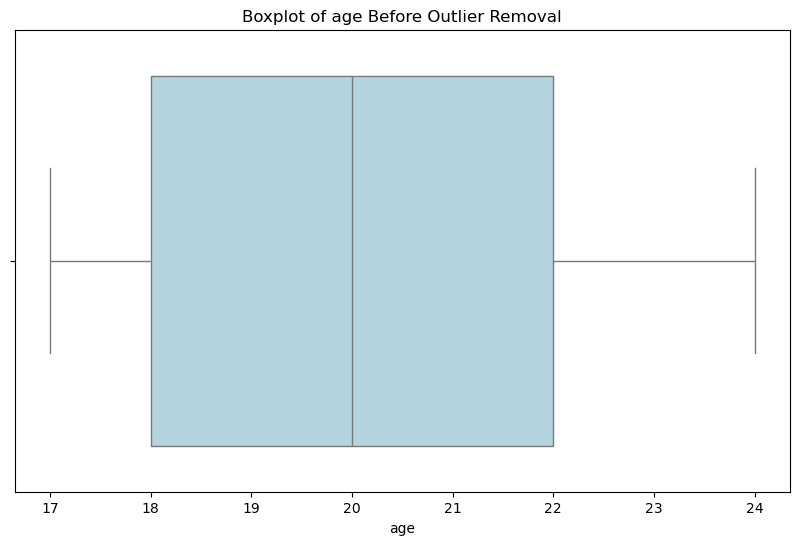

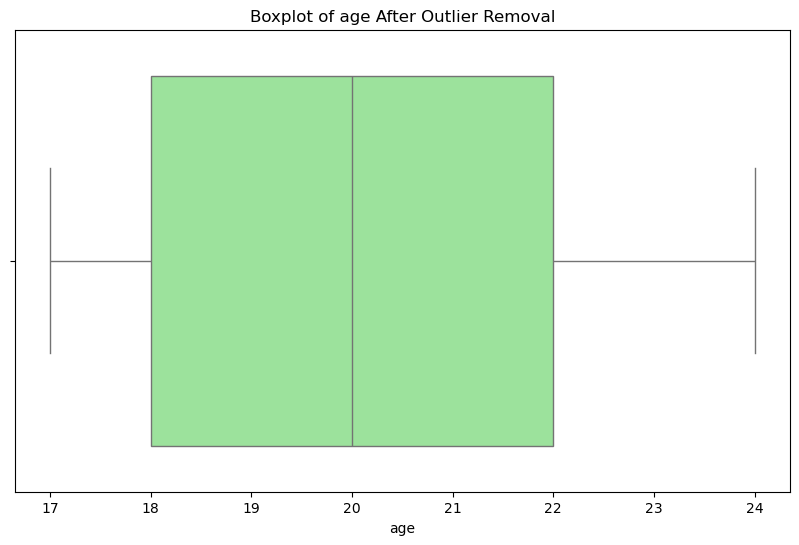

In [ ]:
# Make a code in python which helps them to findout the outliers and then remove outliers and visualize them via boxplot for that dataset.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['age'], color='lightblue')
plt.title('Boxplot of age Before Outlier Removal')
plt.xlabel('age')
plt.show()
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers['age'], color='lightgreen')
plt.title('Boxplot of age After Outlier Removal')
plt.xlabel('age')
plt.show()

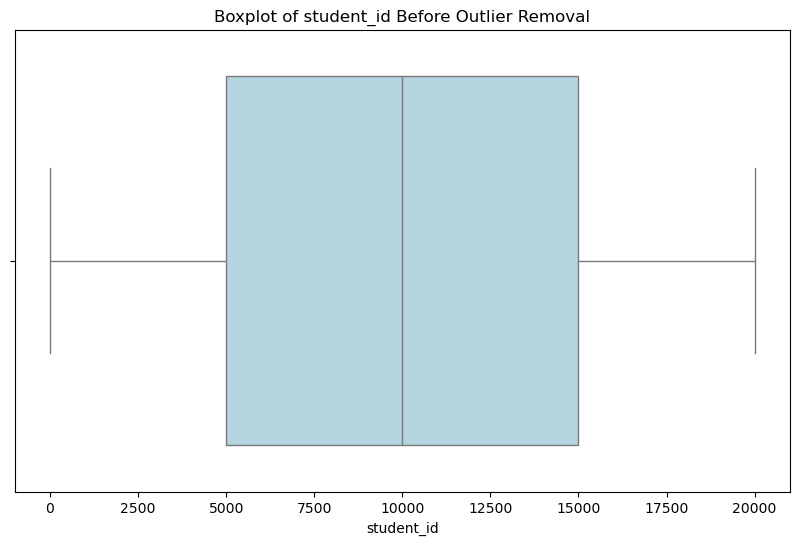

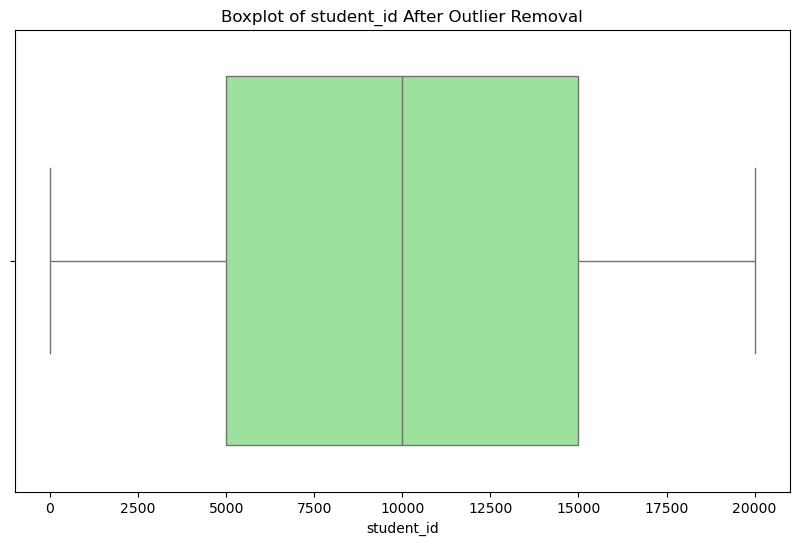

In [ ]:
# Make a code in python which helps them to findout the outliers and then remove outliers and visualize them via boxplot for that dataset.
plt.figure(figsize=(10,6))
sns.boxplot(x=df['student_id'], color='lightblue')
plt.title('Boxplot of student_id Before Outlier Removal')
plt.xlabel('student_id')
plt.show()
Q1 = df['student_id'].quantile(0.25)
Q3 = df['student_id'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['student_id'] >= lower_bound) & (df['student_id'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers['student_id'], color='lightgreen')
plt.title('Boxplot of student_id After Outlier Removal')
plt.xlabel('student_id')
plt.show()

>**First to train the model one by one to check the accuracy of the dataset;**

>**Now to train the model on that dataset.**


# **Smart Study Optimization for Exam Score Prediction Using Machine Learning Models:**

>**This study focuses on training machine learning models to predict exam scores by analyzing how study hours are utilized in a smart, internet-driven learning environment. By leveraging digital resources and efficient study strategies, the model highlights how optimized learning patterns can save time and improve academic performance. It ultimately demonstrates the role of modern technology in enhancing study efficiency and accurate exam outcome prediction.**


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.85      1.00      0.92      3389

    accuracy                           0.85      4000
   macro avg       0.42      0.50      0.46      4000
weighted avg       0.72      0.85      0.78      4000


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.85      1.00      0.92      3389

    accuracy                           0.85      4000
   macro avg       0.42      0.50      0.46      4000
weighted avg       0.72      0.85      0.78      4000


SVM Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       611
           1       0.85      1.00      0.92      3389

    accuracy                           0.85      4000
   macro avg   

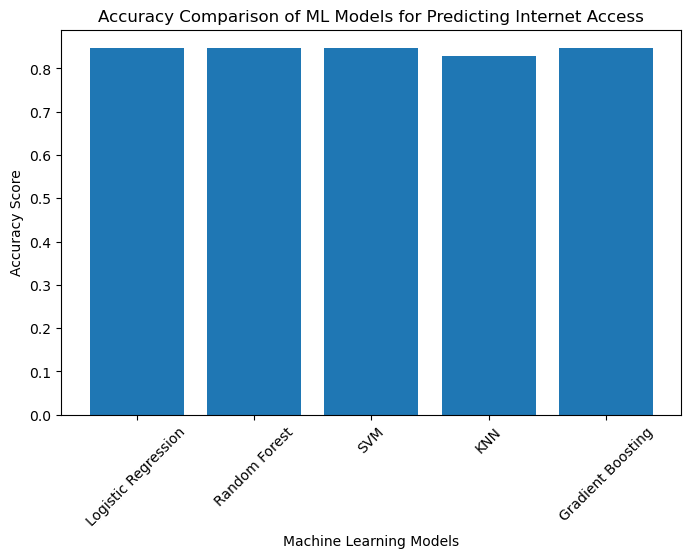

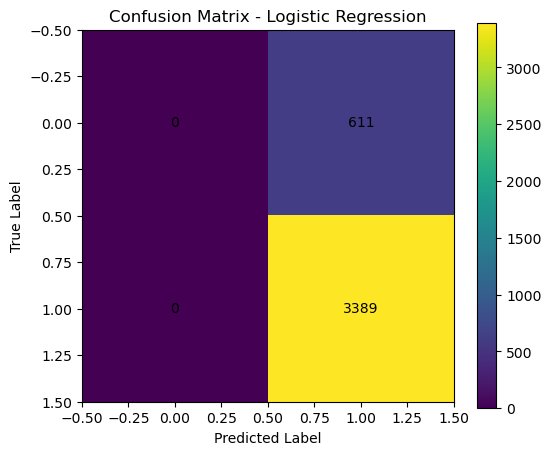

In [54]:
# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=['internet_access'])
y = df['internet_access']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

accuracy_scores = {}
reports = {}

# Train models and generate classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = acc
    reports[name] = classification_report(y_test, y_pred)
    
    print(f"\n{name} Classification Report:\n")
    print(reports[name])

# Best model selection
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
best_predictions = best_model.predict(X_test)

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {accuracy_scores[best_model_name]:.4f}")

# -------- Visualization 1: Accuracy Comparison --------
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of ML Models for Predicting Internet Access")
plt.xticks(rotation=45)
plt.show()

# -------- Visualization 2: Confusion Matrix of Best Model --------
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Annotate values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()

# **Model Performance Analysis for Predicting Internet Access upon the tool for Smart Study Using Machine Learning**

>**The results indicate that smart study supported by internet access plays a significant role in improving learning-related outcomes, as reflected by the consistently high accuracy of all machine learning models. This suggests that students with better internet access tend to show more structured and efficient study patterns. The confusion matrix highlights that the model successfully identifies most cases associated with effective, internet-assisted study behavior, demonstrating strong predictive strength. Overall, the visualization implies that intelligent use of internet resources helps optimize study hours, save time, and enhance academic performance in a modern digital learning environment.**